In [397]:
# Yale Quantum Institute Hackathon
# Date: June 2020
# Team: Quantum Hoppers
#
# Team Members:
# Paola
# Amy
# Nana
# Klaara
# Bruce

In [398]:
from qiskit import *

In [399]:
from qiskit.tools.visualization import plot_histogram

In [400]:
from qiskit.tools.monitor import job_monitor

In [401]:
import numpy

In [402]:
%matplotlib inline

In [403]:
name = input("Enter Your Name:")

Enter Your Name:


In [404]:
if name =="":
    name = "Marie"

In [405]:
# create binary version of name
ascii_name = bytes(name, "ascii")
#print(ascii_name, type(ascii_name))
ascii_name = ' '.join(["{0:b}".format(x) for x in ascii_name])
#print(type(ascii_name), ascii_name)

In [406]:
# QUANTUM CIRCUIT CREATION

In [407]:
# Create 7 circuits becuase each letter has 7 bits
my_quantum_circuit_quantity = 7
my_classical_circuit_quantity = 7

In [408]:
circuit = QuantumCircuit(my_quantum_circuit_quantity,my_classical_circuit_quantity)
#print("Created {} quantum circuits.".format(my_quantum_circuit_quantity))

In [409]:
letters_list = ascii_name.split()
print(letters_list)
# letters_list contains the binary representation of the person's name in a list
# So Marie is '1001101', '1100001', '1110010', '1101001', '1100101'

# take each letter and apply a gate to the quantum circuit based on the 0's and 1's that make up the letter  

for i in range(0, len(letters_list)):
    letters = letters_list[i]
    for j in range(0, len(letters)):
        if int(letters[j])== 1 and i == 0 :
            circuit.h(j)
        if int(letters[j])== 1 and i == 1 :
            circuit.id(j)
        ## if there are two 1's in a row, put a controlled not gate
        if j < len(letters)-1 and int(letters[j])== 1 and int(letters[j+1])== 1 and i == 2 :
            circuit.cx(j,j+1)
        ## if there are two 0's in a row, put a controlled not gate    
        if j < len(letters)-1 and int(letters[j])== 0 and int(letters[j+1])== 0 and i == 2 :
            circuit.cx(j,j+1)
        ## if there are two 1's in a row, put U2  
        if j < len(letters)-2 and int(letters[j])== 1 and int(letters[j+1])== 1 and i == 3 :
            circuit.u2(j,j+1,j+2)
        ## if there are two 0's in a row, put U2      
        if j < len(letters)-2 and int(letters[j])== 0 and int(letters[j+1])== 0 and i == 3 :
            circuit.u2(j,j+1,j+2)
        ## if there are two 1's in a row, put U3    
        if j < len(letters)-2 and int(letters[j])== 1 and int(letters[j+1])== 1 and i == 4 :
            circuit.u3(j,j+1,j+2, j+3)
        ## if there are two 1's in a row, put U3    
        if j < len(letters)-2 and int(letters[j])== 0 and int(letters[j+1])== 0 and i == 4 :
            circuit.u3(j,j+1,j+2, j+3)       
        if int(letters[j])== 1 and i == 5 :
            circuit.u1(j, j-1)
    circuit.barrier()

['1001101', '1100001', '1110010', '1101001', '1100101']


In [410]:
circuit.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])

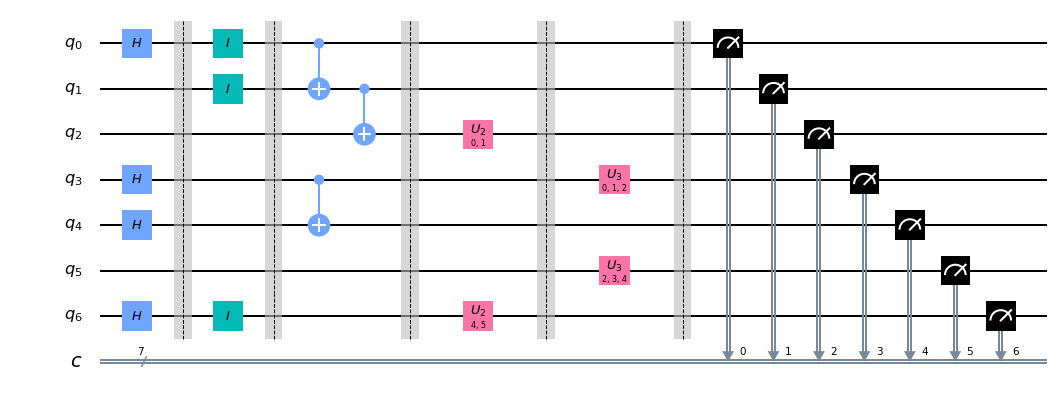

In [411]:
circuit.draw(output='mpl') 

In [412]:
# Preparing to send job to Quantum Computer

In [413]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-06-30 15:06:21,981: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [414]:
provider = IBMQ.get_provider('ibm-q')

In [415]:
#London is 5 qbits  - 8192 shots maximum.

In [416]:
#group = provider.get_backend('ibmq_london')

In [417]:
#Melbourne is 15 qbits  - 8192 shots maximum.

In [418]:
group = provider.get_backend('ibmq_16_melbourne')

In [419]:
simulator = Aer.get_backend('qasm_simulator')

In [420]:
job = execute(circuit, backend = simulator, shots = 1024)

In [421]:
# uncomment this line to run on real quantum computer
# job = execute(circuit, backend = group, shots = 1024)

In [422]:
# show job monitor
job_monitor(job)

Job Status: job has successfully run


In [423]:
result = job.result()

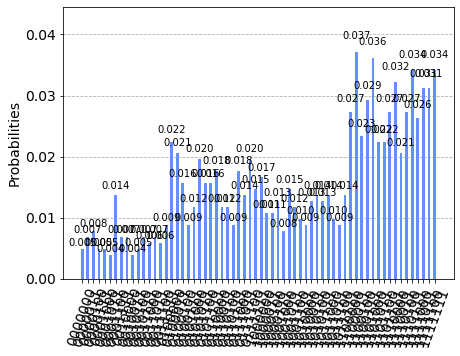

In [424]:
plot_histogram(result.get_counts(circuit))

In [425]:
import operator

counts = result.get_counts()

#final_state = numpy.zeros([1,7], dtype = float)
final_count = numpy.zeros(7, dtype = int)
my_count = 0

for key in counts:
    count = counts[key]
    for i in range(0,len(key)):
        if int(key[i]) == 1:
            final_count[i] = final_count[i] + counts[key]

final_state = final_count / 1024

In [426]:
final_state = final_count / 1024
print("Final  Count: ", final_count)
print("Final State: ", final_state)

Final  Count:  [667 725 508 518 505 507 507]
Final State:  [0.65136719 0.70800781 0.49609375 0.50585938 0.49316406 0.49511719
 0.49511719]


In [427]:
# get the answer that occurred with the most probability
import operator
answer = max(counts.items(), key=operator.itemgetter(1))[0]

In [428]:
print("Thank you")

Thank you


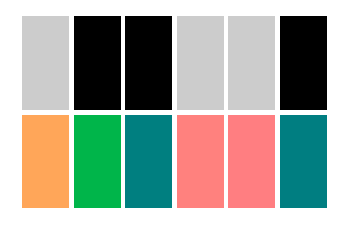

In [429]:
# Create a plot, where 7 binary numbers are represented as a color boxes.
import matplotlib.pyplot as plt
import math
import random

first_letter = letters_list[0]

ax = plt.gca()

for ii in range(0, 6):
    # Define state
    initial_state = int(first_letter[ii])
    #print(initial_state)
    ##print(type(final_state[ii]))
    p_one = final_state[ii]
    # print(p_one)
    p_zero = 1 - p_one
    # Define color according to the state
    color1 = initial_state
    color2 = p_one
    color3 = p_zero
    color_initial = [color1*0.8, color1*0.8, color1*0.8]
    color_final = [color1, color2, color3]
    # print("Color: ", color_initial)
    # Define rectangle
    rectangle_init = plt.Rectangle((ii*1.1, 5.1), width=1, height=2, facecolor=color_initial)
    rectangle_final = plt.Rectangle((ii*1.1, 3), width=1, height=2, facecolor=color_final)
    # Add rectangle to plot
    ax.add_patch(rectangle_init)
    ax.add_patch(rectangle_final)
    
# Create plot
plt.axis("scaled")
plt.axis("off")
plt.show()

# inital state black is 0 grey is 1 
# processed state is red is defined by initial state.
# green is defined by probablity of having one
# blue is defined by probability of having zero
